In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Lets get some data to look at

Movies! IMDB has a lot of information about movies and tv shows and it's easy to download and get.


The documentioan is here:

https://www.imdb.com/interfaces/

Let's look at movie ratings!

In [2]:
ratings = pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz", sep='\t')
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1625
1,tt0000002,6.1,196
2,tt0000003,6.5,1315
3,tt0000004,6.2,119
4,tt0000005,6.1,2095


#### Ok great we have these ratings but what movie are they for?

Looking at the documentation:


#### title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
* tconst (string) - alphanumeric unique identifier of the title
* averageRating – weighted average of all the individual user ratings
* numVotes - number of votes the title has received

We'll have to get the name from somewhere else using "tconst" varialbe to match between dataframes.

#### title.basics.tsv.gz - Contains the following information for titles:
* tconst (string) - alphanumeric unique identifier of the title
* titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title

#### Lets load the titles

In [3]:
titles = pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", sep='\t')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,\N


Let's cleanup some of the data by selecting a type (Movies) and drop a few of the columns we're not going to use.

#### 1) Use titleType to get only movies 
* What are the titleType's?
* How do we get rid of the ones we don't want?

#### 2) Let's drop some things we're not using
* Once we know titleType is Movies we can drop it
* It seems primaryTitle	and originalTitle are the same for most, let's only keep 1
* endYear seems to be only used for tv shows, lets drop endYear and rename startYear to just year.

In [5]:
titles.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

#### Let's select 'movie' and 'tvMovie' and get rid of all the rest.

In [6]:
movies = titles[(titles.titleType == 'movie') | (titles.titleType == 'tvMovie')]

# Also select only non-adult movies to be safe for work
movies = movies[movies.isAdult == 0]

In [7]:
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,\N
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,\N
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,\N
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,\N


### Let's drop some of our unused columns

Use the [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) method built into pandas.

In [8]:
movies = movies.drop(columns=['isAdult', 'originalTitle', 'titleType', 'endYear', 'genres'])

### Let's match up the movies to their rating now. 

[Merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [9]:
movies = movies.merge(ratings, left_on='tconst', right_on='tconst')

In [10]:
movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,5.9,153
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,20,5.2,350
2,tt0000335,Soldiers of the Cross,1900,\N,6.1,41
3,tt0000502,Bohemios,1905,100,3.8,6
4,tt0000574,The Story of the Kelly Gang,1906,70,6.1,583


In [11]:
movies.rename(columns={'startYear': 'Year', 'averageRating': 'Rating'}, inplace=True)

### Let's plot something to see how the data looks

ValueError: could not convert string to float: '\\N'

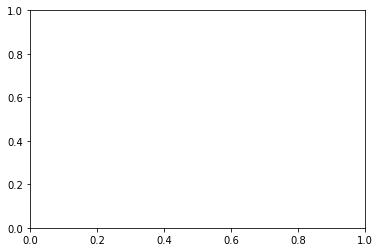

In [12]:
movies.plot.scatter('Year', 'Rating');

### Ooops looks like something is wrong

```
ValueError: could not convert string to float: '\\N'
```

#### A ‘\N’ is used to denote that a particular field is missing or null for that title/name.

Let's take out all the numbered values that are null

First let's make them all into numbers and anything that's not get changed to NaN (Not a number)

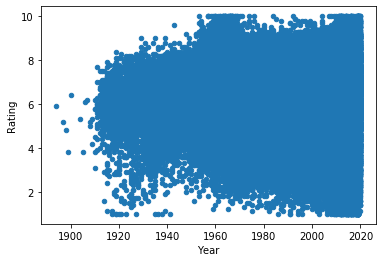

In [13]:
movies.runtimeMinutes = pd.to_numeric(movies.runtimeMinutes, errors='coerce')
movies.Rating = pd.to_numeric(movies.Rating, errors='coerce')
movies.Year = pd.to_numeric(movies.Year, errors='coerce')
movies.numVotes = pd.to_numeric(movies.numVotes, errors='coerce')
movies.dropna(axis=0, how='any', inplace=True)

movies.plot.scatter('Year', 'Rating');

## Now that we have some clean data let's make some cool plots!

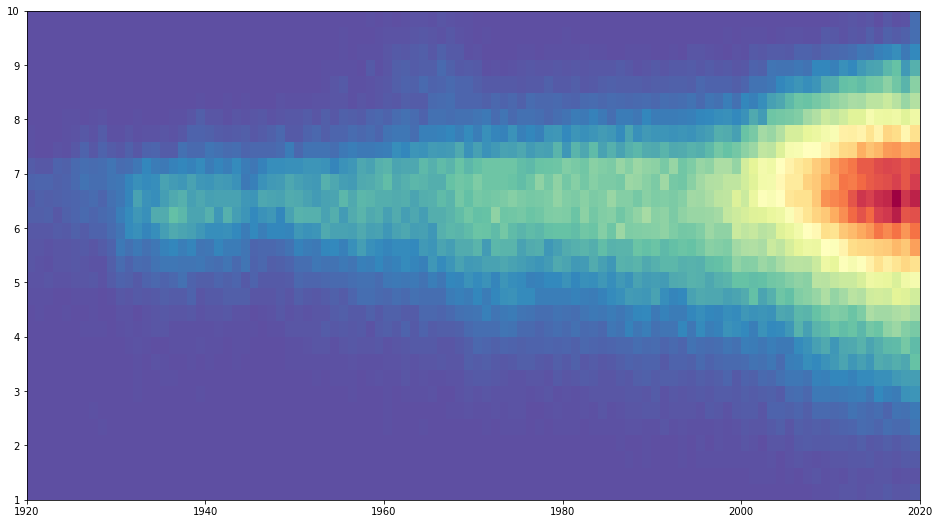

In [14]:
fig = plt.figure(figsize=(16,9))
plt.hist2d(movies.Year, movies.Rating, bins=(100,30), range=((1920,2020),None), cmap='Spectral_r')
plt.show()

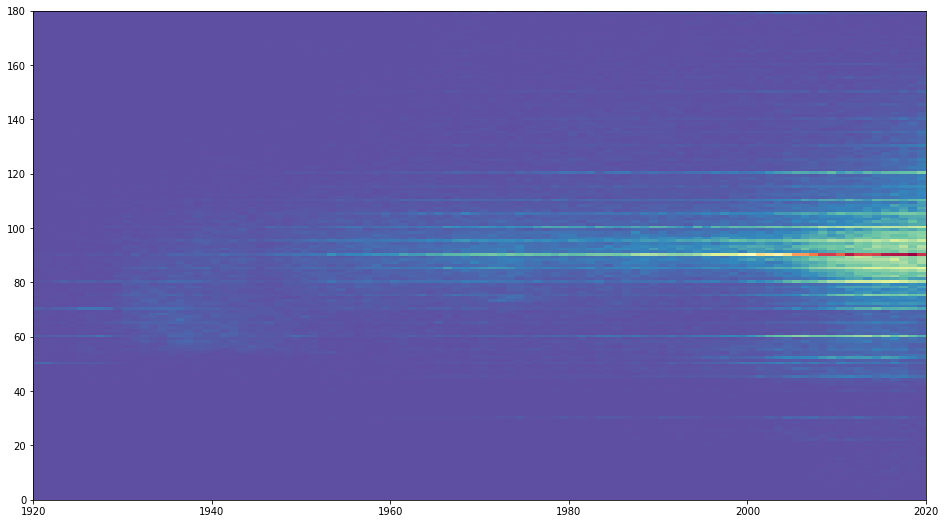

In [15]:
fig = plt.figure(figsize=(16,9))
plt.hist2d(movies.Year, movies.runtimeMinutes, bins=(100,180), range=((1920,2020),(0, 180)), cmap='Spectral_r')
plt.show()

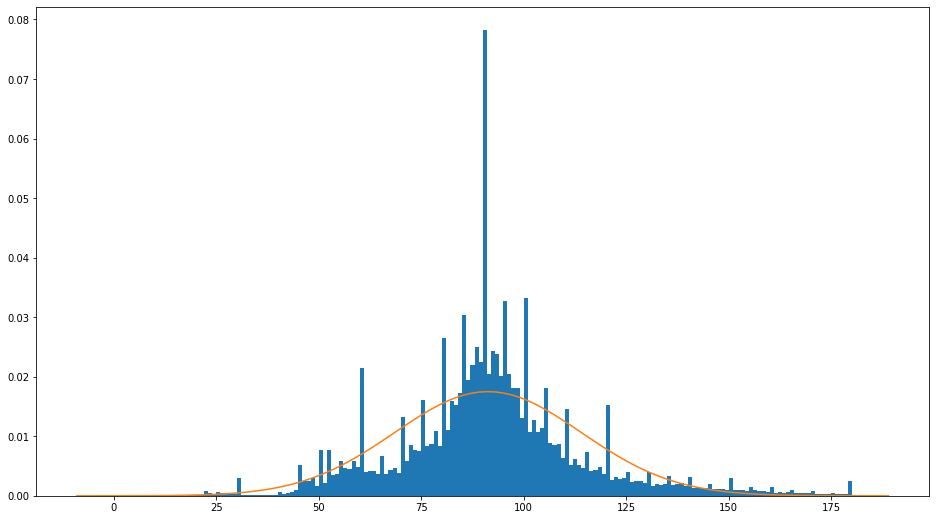

In [16]:

from scipy.stats import norm

fig = plt.figure(figsize=(16,9))
plt.hist(movies.runtimeMinutes, bins=180,range=(0, 180), density=True)
mean,std=norm.fit(movies.runtimeMinutes[movies.runtimeMinutes < 180])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()


In [17]:
top_movies = pd.read_csv("https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv")
top_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [31]:
movies = movies[movies.Rating  >= np.min(top_movies.star_rating)]
movies.head()

,tconst,primaryTitle,Year,runtimeMinutes,Rating,numVotes,star_rating,title,content_rating,genre,duration,actors_list
0,tt0010323,The Cabinet of Dr. Caligari,1920.0,76.0,8.1,54987,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
1,tt0012349,The Kid,1921.0,68.0,8.3,107656,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
2,tt0013442,Nosferatu,1922.0,94.0,7.9,85997,8.0,Nosferatu,UNRATED,Horror,81,"[u'Max Schreck', u'Greta Schr\xf6der', u'Ruth ..."
3,tt0015648,Battleship Potemkin,1925.0,75.0,8.0,51396,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
4,tt0015864,The Gold Rush,1925.0,95.0,8.2,96292,8.3,The Gold Rush,NOT RATED,Adventure,95,"[u'Charles Chaplin', u'Mack Swain', u'Tom Murr..."


In [19]:
movies = movies.merge(top_movies, left_on='primaryTitle', right_on='title')

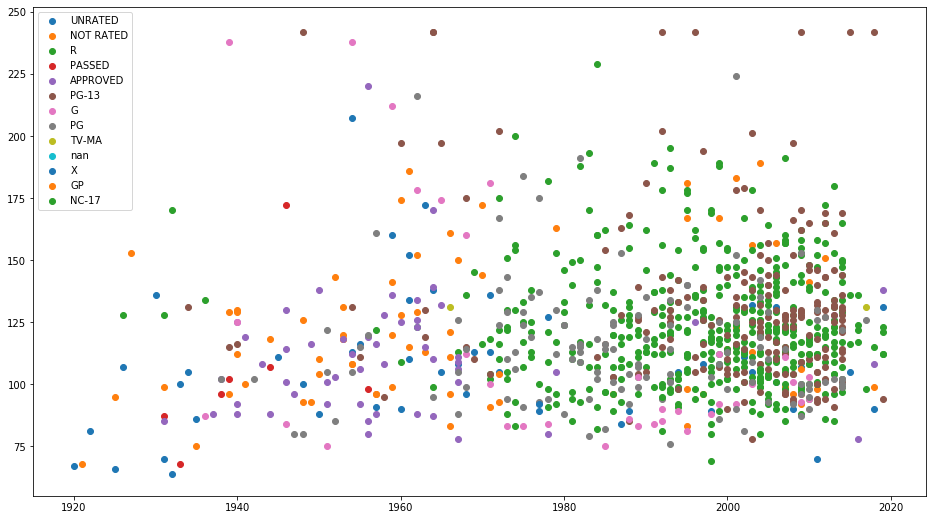

In [35]:
fig = plt.figure(figsize=(16,9))

for content_rating in movies.content_rating.unique():
    movie_content_rating = movies[movies.content_rating == content_rating]
    plt.scatter(movie_content_rating.Year, movie_content_rating.duration, label=content_rating)
    
plt.legend()
plt.show()

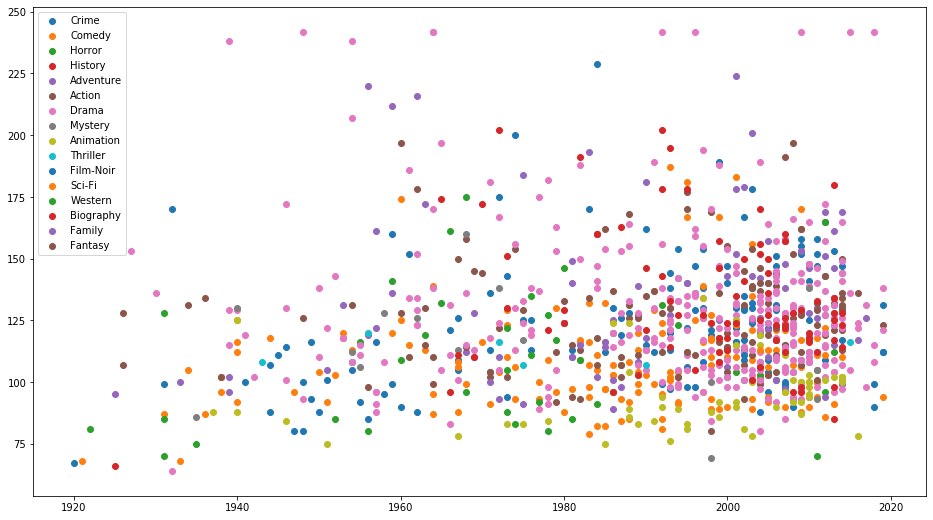

In [36]:
fig = plt.figure(figsize=(16,9))

for genre in movies.genre.unique():
    movie_genre = movies[movies.genre == genre]
    plt.scatter(movie_genre.Year, movie_genre.duration, label=genre)
    
plt.legend()
plt.show()

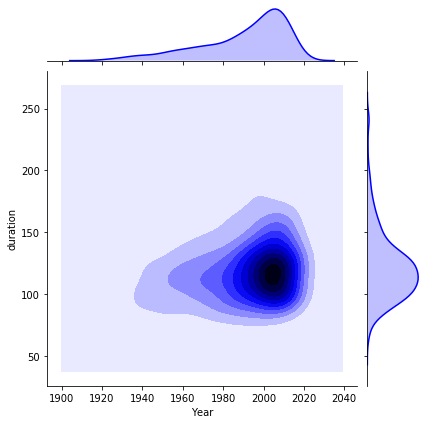

In [42]:
import seaborn as sns
sns.jointplot(x=movies.Year, y=movies.duration, kind='kde' , color="blue");


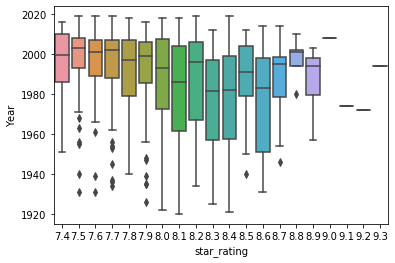

In [52]:
sns.boxplot(y=movies.Year, x=movies.star_rating)